# Dependencies

In [1]:
import pandas as pd
from imblearn.over_sampling import SMOTE
import seaborn as sns
import regex as re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import pickle
import numpy as np

In [2]:
df = pd.read_csv('Corona_NLP_train.csv', encoding='ISO-8859-1')
df2 = pd.read_csv('Corona_NLP_test.csv', encoding='ISO-8859-1')

df = pd.concat([df, df2])
# df = df[(df.loc[:, 'Sentiment'] == 'Negative') | (df.loc[:, 'Sentiment'] == 'Positive')]
df

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative
...,...,...,...,...,...,...
3793,3794,48746,Israel ??,16-03-2020,Meanwhile In A Supermarket in Israel -- People...,Positive
3794,3795,48747,"Farmington, NM",16-03-2020,Did you panic buy a lot of non-perishable item...,Negative
3795,3796,48748,"Haverford, PA",16-03-2020,Asst Prof of Economics @cconces was on @NBCPhi...,Neutral
3796,3797,48749,NaN,16-03-2020,Gov need to do somethings instead of biar je r...,Extremely Negative


In [3]:
df['Len'] = df['OriginalTweet'].apply(len)

In [4]:
df

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Len
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,111
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,237
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,131
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,306
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,310
...,...,...,...,...,...,...,...
3793,3794,48746,Israel ??,16-03-2020,Meanwhile In A Supermarket in Israel -- People...,Positive,127
3794,3795,48747,"Farmington, NM",16-03-2020,Did you panic buy a lot of non-perishable item...,Negative,213
3795,3796,48748,"Haverford, PA",16-03-2020,Asst Prof of Economics @cconces was on @NBCPhi...,Neutral,185
3796,3797,48749,NaN,16-03-2020,Gov need to do somethings instead of biar je r...,Extremely Negative,174


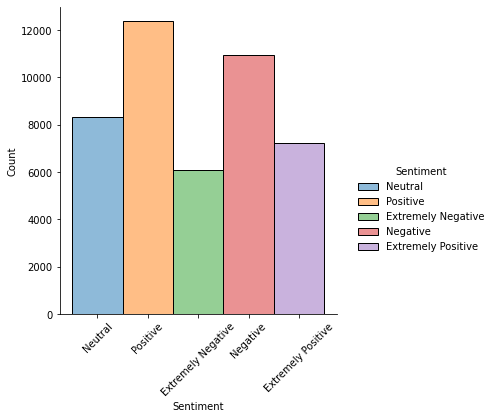

In [5]:
sns.displot(df, x='Sentiment', hue='Sentiment')
plt.xticks(rotation=45)
plt.show()

In [6]:
# Clean stopwords
def clean_stopword(text):
    return " ".join([word.lower() for word in word_tokenize(text) if word not in stopword_list])

In [7]:
stopword_list = set(stopwords.words('english'))

In [8]:
extra_punct = [
    ',', '.', '"', ':', ')', '(', '!', '?', '|', ';', "'", '$', '&',
    '/', '[', ']', '>', '%', '=', '#', '*', '+', '\\', '•',  '~', '@', '£',
    '·', '_', '{', '}', '©', '^', '®', '`',  '<', '→', '°', '€', '™', '›',
    '♥', '←', '×', '§', '″', '′', 'Â', '█', '½', 'à', '…', '“', '★', '”',
    '–', '●', 'â', '►', '−', '¢', '²', '¬', '░', '¶', '↑', '±', '¿', '▾',
    '═', '¦', '║', '―', '¥', '▓', '—', '‹', '─', '▒', '：', '¼', '⊕', '▼',
    '▪', '†', '■', '’', '▀', '¨', '▄', '♫', '☆', 'é', '¯', '♦', '¤', '▲',
    'è', '¸', '¾', 'Ã', '⋅', '‘', '∞', '∙', '）', '↓', '、', '│', '（', '»',
    '，', '♪', '╩', '╚', '³', '・', '╦', '╣', '╔', '╗', '▬', '❤', 'ï', 'Ø',
    '¹', '≤', '‡', '√', '«', '»', '´', 'º', '¾', '¡', '§', '£', '₤']

In [9]:
# Clean special character
def clean_special_character(text):
    return re.sub('[^a-zA-Z\s]', "", text)

In [10]:
df['OriginalTweet'] = df['OriginalTweet'].apply(clean_special_character)

In [11]:
df['OriginalTweet'] = df['OriginalTweet'].apply(clean_stopword)

In [12]:
df['Len'] = df['OriginalTweet'].apply(len)

# Label encoding

In [13]:
le = LabelEncoder()
df['Sentiment'] = le.fit_transform(df['Sentiment'])

In [14]:
df

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Len
0,3799,48751,London,16-03-2020,menyrbie philgahan chrisitv httpstcoifzfanpa h...,3,79
1,3800,48752,UK,16-03-2020,advice talk neighbours family exchange phone n...,4,196
2,3801,48753,Vagabonds,16-03-2020,coronavirus australia woolworths give elderly ...,4,116
3,3802,48754,NaN,16-03-2020,my food stock one empty please dont panic ther...,4,208
4,3803,48755,NaN,16-03-2020,me ready go supermarket covid outbreak not im ...,0,221
...,...,...,...,...,...,...,...
3793,3794,48746,Israel ??,16-03-2020,meanwhile in a supermarket israel people dance...,4,102
3794,3795,48747,"Farmington, NM",16-03-2020,did panic buy lot nonperishable items echo nee...,2,154
3795,3796,48748,"Haverford, PA",16-03-2020,asst prof economics cconces nbcphiladelphia ta...,3,126
3796,3797,48749,NaN,16-03-2020,gov need somethings instead biar je rakyat ass...,0,150


# Vectorize

In [15]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df['OriginalTweet'])
y = df['Sentiment']

In [16]:
sm = SMOTE(random_state=1)

In [17]:
X_res, y_res = sm.fit_resample(X, y)

In [18]:
X_res

<61845x85941 sparse matrix of type '<class 'numpy.float64'>'
	with 1386048 stored elements in Compressed Sparse Row format>

In [19]:
df_resampled = pd.DataFrame()
df_resampled['Sentiment'] = y_res
df_resampled['SentimentLabel'] =  le.inverse_transform(y_res)
df_resampled 

,Sentiment,SentimentLabel
0,3,Neutral
1,4,Positive
2,4,Positive
3,4,Positive
4,0,Extremely Negative
...,...,...
61840,3,Neutral
61841,3,Neutral
61842,3,Neutral
61843,3,Neutral


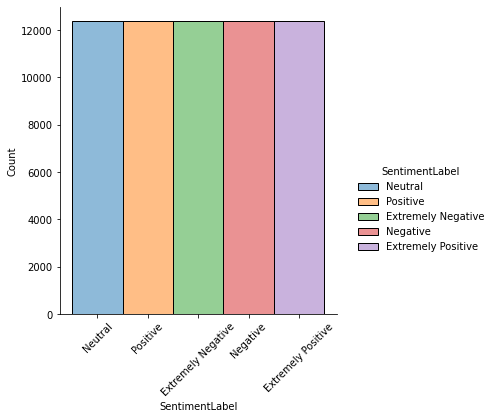

In [20]:
sns.displot(df_resampled, x='SentimentLabel', hue='SentimentLabel')
plt.xticks(rotation=45)
plt.show()

In [25]:
X_res[0].toarray()

array([[0., 0., 0., ..., 0., 0., 0.]])

In [27]:
data_to_pickle = {'X' : X_res
                  ,'y' : y_res}

In [32]:
with open('pickled_data.pkl', 'wb') as f:
    pickle.dump(data_to_pickle, f)

# Model

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_res, y_res, test_size=.2, random_state=42)

In [ ]:
data_to_pickled = {'X_train' : x_train, 
                  'y_train' : y_train}

In [ ]:
# with open('training_data.pkl', 'wb') as f:
#     pickle.dump(data_to_pickled, f)

In [ ]:
with open('training_data.pkl', 'rb') as f:
    loaded_data = pickle.load(f)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, r2_score, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
clf = SVC()

In [ ]:
clf.fit(x_train, y_train)

In [ ]:
y_predict = clf.predict(x_test)

In [ ]:
print(f'Accuracy : {accuracy_score(y_test, y_predict)}')
print(f'r2 score : {r2_score(y_test, y_predict)}')

In [ ]:
cm = confusion_matrix(y_test, y_predict)
cm

In [ ]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.inverse_transform(clf.classes_))
cm_display.plot(xticks_rotation=45)
plt.show()